In [43]:
from base_code import *

valid_data = pd.read_csv('../neurosurgeon35_data/neurosurgeon35.csv', index_col='Respondent ID')
xai25 = pd.read_csv('../computational_data/xai25.csv')
mri_wise = pd.read_csv('../computational_data/mri_wise_acc.csv')
dr_wise = pd.read_csv('../computational_data/dr_wise_acc.csv')
fold1 = pd.read_csv('../computational_data/cv_result_fold_1.csv')

# 1. Prepare a long table to calculate the ROC and Precision-Recall Curve (PR Curve)

The long table with col: Response ID, dataID, gt, AI, dr, drAI, drXAI


In [2]:
drAlone = valid_data.filter(regex='What grade of glioma would you predict')
ai = valid_data.filter(regex='After viewing AI’s suggestion')
xai = valid_data.filter(regex='After viewing AI’s explanation')

gt_long = xai25[['dataID','gt','pred']]
gt_long = gt_long.rename(columns={'pred':'AI'})
gt_idx = gt_long.set_index(keys='dataID')


drAlone = drAlone.rename(columns = {c: gt_long['dataID'].iloc[i] for i, c in enumerate(drAlone.columns)}).transpose().reset_index(level=0).rename(columns={'index':'dataID'})
drAlone_long = drAlone.melt(id_vars = 'dataID' , value_vars = range(1, 36)).rename(columns={'value':'drAlone'}).set_index(['dataID', 'Respondent ID'])
ai = ai.rename(columns = {c: gt_long['dataID'].iloc[i] for i, c in enumerate(ai.columns)}).transpose().reset_index(level=0).rename(columns={'index':'dataID'})
ai_long = ai.melt(id_vars = 'dataID' , value_vars = range(1, 36)).rename(columns={'value':'drAI'}).set_index(['dataID', 'Respondent ID'])
xai = xai.rename(columns = {c: gt_long['dataID'].iloc[i] for i, c in enumerate(xai.columns)}).transpose().reset_index(level=0).rename(columns={'index':'dataID'})
xai_long = xai.melt(id_vars = 'dataID' , value_vars = range(1, 36)).rename(columns={'value':'drXAI'}).set_index(['dataID', 'Respondent ID'])


will_check_xai =  valid_data.filter(regex='button in the AI system').replace({"Yes":1, "No":0})
will_check_xai = will_check_xai.rename(columns = {c: gt_long['dataID'].iloc[i] for i, c in enumerate(will_check_xai.columns)}).transpose().reset_index(level=0).rename(columns={'index':'dataID'})
will_check_xai_long = will_check_xai.melt(id_vars = 'dataID' , value_vars = range(1, 36)).rename(columns={'value':'will_check_xai'}).set_index(['dataID', 'Respondent ID'])

xai_qual = valid_data.filter(regex='How closely does the highlighted area of the color map match with your clinical judgment?').fillna(-1).astype(int)
xai_qual = xai_qual.rename(columns = {c: gt_long['dataID'].iloc[i] for i, c in enumerate(xai_qual.columns)}).transpose().reset_index(level=0).rename(columns={'index':'dataID'})
xai_qual_long = xai_qual.melt(id_vars = 'dataID' , value_vars = range(1, 36)).rename(columns={'value':'xai_qual'}).set_index(['dataID', 'Respondent ID'])


ai_xai = pd.concat([drAlone_long, ai_long, xai_long, will_check_xai_long, xai_qual_long],  axis = 1)
result_long = ai_xai.reset_index(level = 0).reset_index(level = 0)

result_long['gt']= result_long.apply(lambda row: gt_idx['gt'][row['dataID']], axis = 1)
result_long['AIpred']= result_long.apply(lambda row: gt_idx['AI'][row['dataID']], axis = 1)
# result_long.to_csv('../computational_data/result_long.csv')

In [3]:
result_long

,Respondent ID,dataID,drAlone,drAI,drXAI,will_check_xai,xai_qual,gt,AIpred
0,1,BraTS20_Training_221,1.0,1.0,1.0,NaN,6,1,1
1,1,BraTS20_Training_208,1.0,1.0,1.0,0.0,5,1,1
2,1,BraTS20_Training_116,1.0,1.0,1.0,0.0,6,1,1
3,1,BraTS20_Training_114,0.0,0.0,0.0,1.0,4,1,1
4,1,BraTS20_Training_112,1.0,1.0,1.0,0.0,5,1,1
...,...,...,...,...,...,...,...,...,...
870,35,BraTS20_Training_269,NaN,NaN,NaN,NaN,-1,0,0
871,35,BraTS20_Training_264,NaN,NaN,NaN,NaN,-1,0,0
872,35,BraTS20_Training_280,NaN,NaN,NaN,NaN,-1,0,0
873,35,BraTS20_Training_171,NaN,NaN,NaN,NaN,-1,1,0


# 2. Plot the ROC and PC Curve for class = 1, GBM

sensitivity: 0.9152542372881356, specificity: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.96      0.92      0.94        59

    accuracy                           0.91        74
   macro avg       0.84      0.89      0.86        74
weighted avg       0.92      0.91      0.91        74

[0.90056497 0.90056497]
auroc 0.9005649717514124
1 [0.2857142857142857, 0.2857142857142857, 0.14285714285714285] [0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
2 [1.0] [1.0]
3 [0.42857142857142855, 0.42857142857142855, 0.42857142857142855] [0.9444444444444444, 0.9444444444444444, 0.9444444444444444]
4 [0.42857142857142855, 0.2857142857142857, 0.2857142857142857] [0.8888888888888888, 1.0, 1.0]
5 [0.2857142857142857, 0.14285714285714285, 0.14285714285714285] [0.9444444444444444, 0.9444444444444444, 0.9444444444444444]
6 [0.42857142857142855, 0.14285714285714285, 0.14285714285714285] [0.833

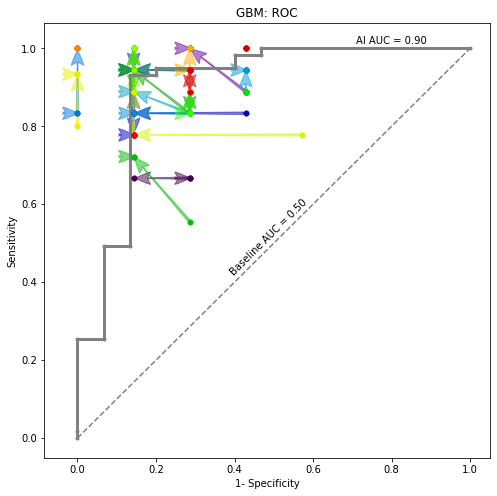

pr-rc 1 [0.6666666666666666, 0.6666666666666666, 0.6666666666666666] [0.8571428571428571, 0.8571428571428571, 0.9230769230769231]
pr-rc 2 [1.0, 1.0, 1.0] [0.6666666666666666, 1.0, 1.0]
pr-rc 3 [0.9444444444444444, 0.9444444444444444, 0.9444444444444444] [0.85, 0.85, 0.85]
pr-rc 4 [0.8888888888888888, 1.0, 1.0] [0.8421052631578947, 0.9, 0.9]
pr-rc 5 [0.9444444444444444, 0.9444444444444444, 0.9444444444444444] [0.8947368421052632, 0.9444444444444444, 0.9444444444444444]
pr-rc 6 [0.8333333333333334, 0.8333333333333334, 0.8888888888888888] [0.8333333333333334, 0.9375, 0.9411764705882353]
pr-rc 7 [0.8333333333333334, 0.7777777777777778, 0.7777777777777778] [0.9375, 0.9333333333333333, 0.9333333333333333]
pr-rc 8 [0.8333333333333334, 1.0, 0.9444444444444444] [0.9375, 0.9473684210526315, 0.9444444444444444]
pr-rc 9 [0.8333333333333334, 0.8333333333333334, 1.0] [1.0, 1.0, 1.0]
pr-rc 10 [0.8333333333333334, 0.8333333333333334, 0.8333333333333334] [0.8823529411764706, 0.9375, 0.9375]
pr-rc 11 [0

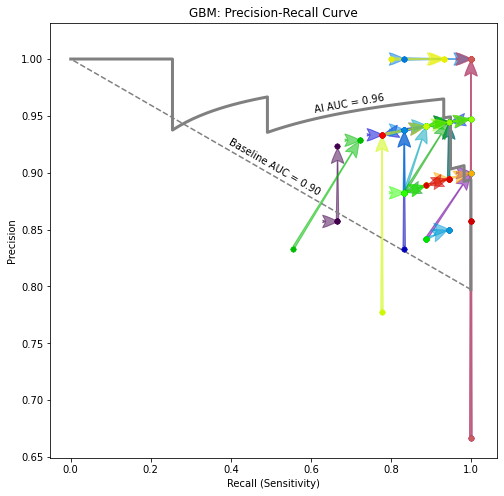

(<Figure size 576x576 with 1 Axes>,
 <Axes: title={'center': 'GBM: ROC'}, xlabel='1- Specificity', ylabel='Sensitivity'>,
 <Axes: title={'center': 'GBM: Precision-Recall Curve'}, xlabel='Recall (Sensitivity)', ylabel='Precision'>)

In [4]:
get_metrics(result_long = result_long, results = fold1, label =1)

# 3. Plot the ROC and PC Curve for class = 0, grade II/III

sensitivity: 0.8666666666666667, specificity: 0.9152542372881356
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.96      0.92      0.94        59

    accuracy                           0.91        74
   macro avg       0.84      0.89      0.86        74
weighted avg       0.92      0.91      0.91        74

[0.90056497 0.90056497]


/Users/root202/Software/anaconda3/envs/posthoc-eval/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/root202/Software/anaconda3/envs/posthoc-eval/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/root202/Software/anaconda3/envs/posthoc-eval/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/root202/

auroc 0.9005649717514125
1 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333] [0.7142857142857143, 0.7142857142857143, 0.8571428571428571]
2 [0.0] [0.0]
3 [0.05555555555555555, 0.05555555555555555, 0.05555555555555555] [0.5714285714285714, 0.5714285714285714, 0.5714285714285714]
4 [0.1111111111111111, 0.0, 0.0] [0.5714285714285714, 0.7142857142857143, 0.7142857142857143]
5 [0.05555555555555555, 0.05555555555555555, 0.05555555555555555] [0.7142857142857143, 0.8571428571428571, 0.8571428571428571]
6 [0.16666666666666666, 0.16666666666666666, 0.1111111111111111] [0.5714285714285714, 0.8571428571428571, 0.8571428571428571]
7 [0.16666666666666666, 0.2222222222222222, 0.2222222222222222] [0.8571428571428571, 0.8571428571428571, 0.8571428571428571]
8 [0.16666666666666666, 0.0, 0.05555555555555555] [0.8571428571428571, 0.8571428571428571, 0.8571428571428571]
9 [0.16666666666666666, 0.16666666666666666, 0.0] [1.0, 1.0, 1.0]
10 [0.16666666666666666, 0.16666666666666666, 0.1666666666666

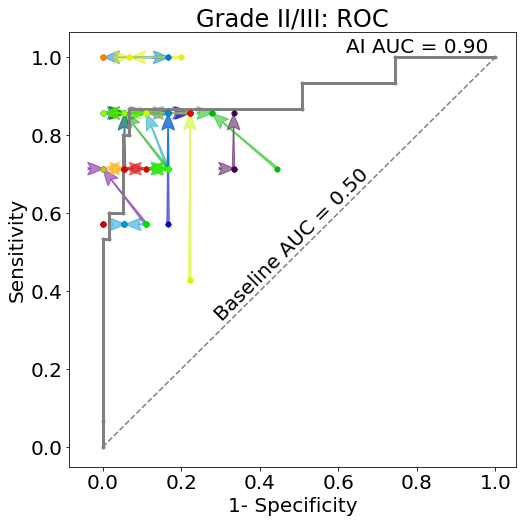

pr-rc 1 [0.7142857142857143, 0.7142857142857143, 0.8571428571428571] [0.45454545454545453, 0.45454545454545453, 0.5]
pr-rc 3 [0.5714285714285714, 0.5714285714285714, 0.5714285714285714] [0.8, 0.8, 0.8]
pr-rc 4 [0.5714285714285714, 0.7142857142857143, 0.7142857142857143] [0.6666666666666666, 1.0, 1.0]
pr-rc 5 [0.7142857142857143, 0.8571428571428571, 0.8571428571428571] [0.8333333333333334, 0.8571428571428571, 0.8571428571428571]
pr-rc 6 [0.5714285714285714, 0.8571428571428571, 0.8571428571428571] [0.5714285714285714, 0.6666666666666666, 0.75]
pr-rc 7 [0.8571428571428571, 0.8571428571428571, 0.8571428571428571] [0.6666666666666666, 0.6, 0.6]
pr-rc 8 [0.8571428571428571, 0.8571428571428571, 0.8571428571428571] [0.6666666666666666, 1.0, 0.8571428571428571]
pr-rc 9 [1.0, 1.0, 1.0] [0.6666666666666666, 0.6666666666666666, 1.0]
pr-rc 10 [0.7142857142857143, 0.8571428571428571, 0.8571428571428571] [0.625, 0.6666666666666666, 0.6666666666666666]
pr-rc 11 [0.5714285714285714, 0.5714285714285714,

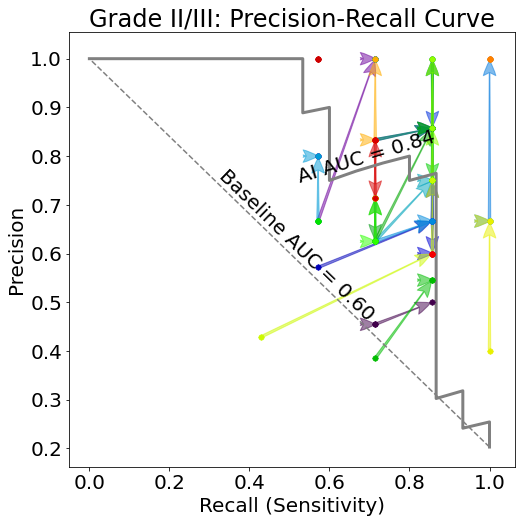

In [5]:
fig, ax, ax1 =get_metrics(result_long = result_long, results = fold1, label =0)

# 4. Correlation between dr task improvment and clinical experience

In [45]:
import pingouin as pg

# We test the correlation between the accuracy increase after AI assistance, 
# and physicians' years of practicing specialty. 
# and with trust and willing to use ai
dr_wise_acc = dr_wise.dropna(subset=['Year of Neurosurgery', 'DR+AI', 'DR', 'DR+XAI'])
# normality assumption test for pearson r correlation
print(pg.normality(dr_wise_acc['Year of Neurosurgery']))                                    
print(pg.normality(dr_wise_acc['DR+AI']-dr_wise_acc['DR']))  
print(pg.normality(dr_wise_acc['DR+XAI']-dr_wise_acc['DR']))  

                             W      pval  normal
Year of Neurosurgery  0.740774  0.000015   False
          W      pval  normal
0  0.867554  0.002616   False
          W      pval  normal
0  0.852911  0.001316   False


/Users/root202/Software/anaconda3/envs/posthoc-eval/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/root202/Software/anaconda3/envs/posthoc-eval/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [46]:
# since the normality assumption for pearson r failed, we report spearman correlation
from scipy.stats import spearmanr
spearmanr(dr_wise_acc['Year of Neurosurgery'], dr_wise_acc['DR+AI']-dr_wise_acc['DR'])

SpearmanrResult(correlation=-0.23142720171394315, pvalue=0.24544638669864854)

In [48]:
spearmanr(dr_wise_acc['Year of Neurosurgery'], dr_wise_acc['DR+XAI']-dr_wise_acc['DR'])

SpearmanrResult(correlation=-0.04693017824573368, pvalue=0.8161922468552031)

<ipython-input-41-9ed3e60e33a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_wise_acc['DR_AI-DR'] = dr_wise_acc['DR+AI']-dr_wise_acc['DR']
<ipython-input-41-9ed3e60e33a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_wise_acc['DR_XAI-DR'] = dr_wise_acc['DR+XAI']-dr_wise_acc['DR']


-0.0026940371456500504 0.05323167155425219
-0.0015405669599218015 0.047992179863147605


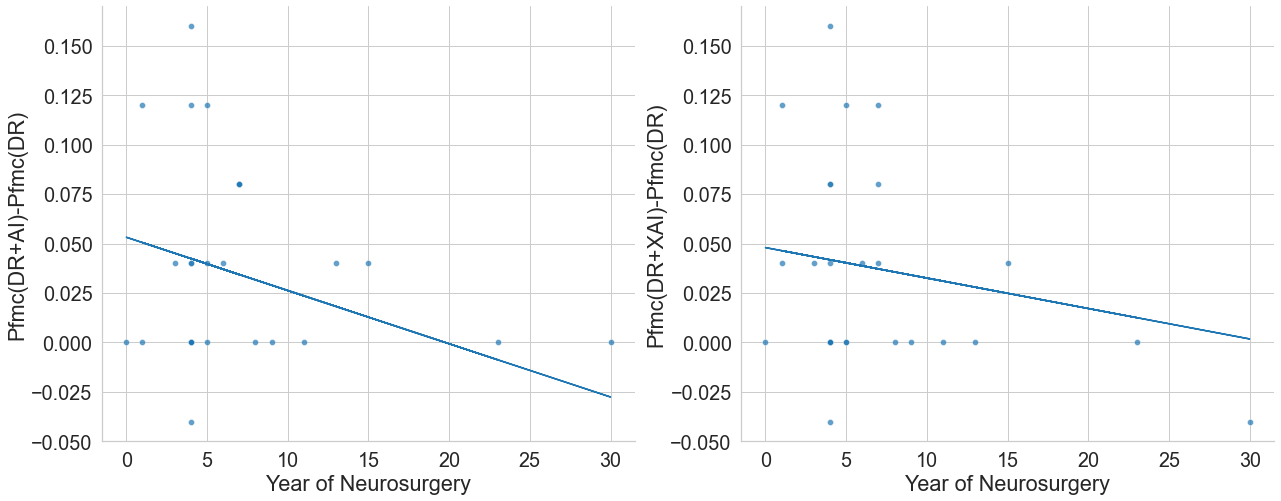

In [41]:
dr_wise_acc['DR_AI-DR'] = dr_wise_acc['DR+AI']-dr_wise_acc['DR']
dr_wise_acc['DR_XAI-DR'] = dr_wise_acc['DR+XAI']-dr_wise_acc['DR']

# plot correlation 
sns.set_style("whitegrid")
with sns.plotting_context("notebook", font_scale=1.8):

    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(21,8))
    plt.rcParams.update({'font.size': 8})

    m, b = np.polyfit(dr_wise_acc['Year of Neurosurgery'], dr_wise_acc['DR_AI-DR'], 1)
    print(m,b)
    ax1.plot(dr_wise_acc['Year of Neurosurgery'], m*dr_wise_acc['Year of Neurosurgery'] + b)

    m, b = np.polyfit(dr_wise_acc['Year of Neurosurgery'], dr_wise_acc['DR_XAI-DR'], 1)
    print(m,b)
    ax2.plot(dr_wise_acc['Year of Neurosurgery'], m*dr_wise_acc['Year of Neurosurgery'] + b)

    sns.scatterplot(ax = ax2, data = dr_wise_acc, x = 'Year of Neurosurgery', y = 'DR_AI-DR', alpha = 0.7)
    sns.scatterplot(ax = ax1, data = dr_wise_acc, x = 'Year of Neurosurgery', y = 'DR_XAI-DR', alpha = 0.7)
    sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

    ax1.set_xlabel("Year of Neurosurgery")
    ax1.set_ylabel("Pfmc(DR+AI)-Pfmc(DR)")
    ax2.set_xlabel("Year of Neurosurgery")
    ax2.set_ylabel("Pfmc(DR+XAI)-Pfmc(DR)")
    plt.savefig('../reporting/corr_pfmc_imprmt.pdf', bbox_inches="tight")


In [35]:
dr_wise_acc

,Respondent ID,DR,DR+AI,DR+XAI,MRI_DR,MRI_DR+AI,MRI_DR+XAI,XAI Qual,XAI Qual Std,Need XAI,Position,Year of Med,Year of Neurosurgery,AI Familiarity,AI Attitude,DR_AI-DR,DR_XAI-DR
0,1,0.68,0.68,0.72,25,25,25,5.240000,1.241934,0.333333,Attending,23.0,13.0,hear of AI,Skeptical,0.00,0.04
2,3,0.84,0.84,0.84,25,25,25,1.040000,0.773563,0.160000,Attending,33.0,23.0,use AI in work/life,Not interested,0.00,0.00
3,4,0.80,0.92,0.92,25,25,25,8.680000,2.185772,1.000000,Resident,1.0,1.0,use AI in work/life,Interested,0.12,0.12
4,5,0.88,0.92,0.92,25,25,25,7.833333,1.027402,0.086957,Resident,3.0,3.0,hear of AI,Interested,0.04,0.04
5,6,0.76,0.84,0.88,25,25,25,5.250000,1.534329,0.120000,Attending,14.0,4.0,hear of AI,Skeptical,0.08,0.12
6,7,0.84,0.80,0.80,25,25,25,6.208333,2.235680,0.960000,Resident,4.0,4.0,hear of AI,Neutral,-0.04,-0.04
7,8,0.84,0.96,0.92,25,25,25,5.040000,2.068429,0.280000,Resident,7.0,7.0,hear of AI,Skeptical,0.12,0.08
9,10,0.80,0.84,0.84,25,25,25,6.600000,2.607681,0.200000,Attending,13.0,6.0,NaN,Excited,0.04,0.04
10,11,0.80,0.84,0.84,25,25,25,6.200000,1.766352,0.000000,Resident,4.0,4.0,"can program, but not write AI code",Interested,0.04,0.04
11,12,0.80,0.88,0.88,25,25,25,7.800000,2.939388,0.960000,Fellow,7.0,7.0,"can program, but not write AI code","Interested, Excited",0.08,0.08


In [30]:
dr_wise_acc.shape

(27, 17)